In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV #hyperparameter
import matplotlib.pyplot as plt
import itertools

In [2]:
#load CSV files
app_record_df = pd.read_csv("application_record.csv")

credit_record_df = pd.read_csv("credit_record.csv")

In [3]:
#explore the dataset

app_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
app_record_df.info()
credit_record_df.info()

app_record_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
credit_record_df.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [7]:
app_record_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
credit_record_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
#check if there are duplicate record
print ( "The number of unique record for application record = " + str(app_record_df["ID"].nunique() ))
#print ( "The number of unique record for credit record = " + str(credit_record_df["ID"].nunique() ))


The number of unique record for application record = 438510


In [10]:
# check  how many records match in two csv files

print( "The number of common record = " + str(len(set(credit_record_df["ID"]).intersection(set(app_record_df['ID'])))))

The number of common record = 36457


In [11]:
#start cleaning the data

In [12]:
#drop duplicate record
app_record_df_clean = app_record_df.drop_duplicates(subset=['ID'])
#credit_record_df_clean = credit_record_df.drop_duplicates(subset=['ID'])

In [13]:
app_record_df_clean.info()
credit_record_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

NameError: name 'credit_record_df_clean' is not defined

In [ ]:
# we have seen occupation type has 134203 record with NULL/NA, we should drop this column as no meaningful insight 
#can be generated from this data attribute
app_record_df_clean.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [14]:
app_record_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
app_record_df_clean.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [16]:
replace_dict_gender= {'M':1,'F':0}
replace_dict_yes_no = {'Y':1,'N':0}


app_record_df_clean2 = app_record_df_clean.copy()

app_record_df_clean2['CODE_GENDER']=app_record_df_clean2['CODE_GENDER'].map(replace_dict_gender)
app_record_df_clean2['FLAG_OWN_CAR']=app_record_df_clean2['FLAG_OWN_CAR'].map(replace_dict_yes_no)
app_record_df_clean2['FLAG_OWN_REALTY']=app_record_df_clean2['FLAG_OWN_REALTY'].map(replace_dict_yes_no)

#app_record_df_clean2 = app_record_df_clean.copy()
#qpp_record_df_clean2['CODE_GENDER'].replace(0, 'F',inplace=True)
#app_record_df_clean2['CODE_GENDER'].replace(1, 'M',inplace=True)


In [17]:
app_record_df_clean2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [18]:
#find out possible value for NAME_INCOME_TYPE

name_income_type_list = app_record_df_clean2['NAME_INCOME_TYPE'].to_numpy()
print(name_income_type_list)

['Working' 'Working' 'Working' ... 'Commercial associate' 'Pensioner'
 'Working']


In [19]:
output = []
for x in name_income_type_list:
    if x not in output:
        output.append(x)
print(output)

['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student']


In [20]:
#define a function to print out all possible values of a column from a dataframe
def printallvalues (inputlist):
    output = []
    for x in inputlist:
        if x not in output:
            output.append(x)
    print(output)

printallvalues(app_record_df_clean2['NAME_INCOME_TYPE'].to_numpy())
printallvalues(app_record_df_clean2['NAME_EDUCATION_TYPE'].to_numpy())
printallvalues(app_record_df_clean2['NAME_FAMILY_STATUS'].to_numpy())
printallvalues(app_record_df_clean2['NAME_HOUSING_TYPE'].to_numpy())

['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student']
['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
['Civil marriage', 'Married', 'Single / not married', 'Separated', 'Widow']
['Rented apartment', 'House / apartment', 'Municipal apartment', 'With parents', 'Co-op apartment', 'Office apartment']


In [21]:
replace_dict_Income_type = {'Working':0,'Commercial associate':1,'Pensioner':2, 'State servant':3, 'Student':4}
replace_dict_education_type= {'Higher education':0,'Secondary / secondary special':1,'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}
replace_dict_family_status= {'Civil marriage':0,'Married':1,'Single / not married':2, 'Separated':3, 'Widow':4}
replace_dict_housing_type= {'Rented apartment':0,'House / apartment':1,'Municipal apartment':2, 'With parents':3, 'Co-op apartment':4, 'Office apartment':5}


app_record_df_clean2['NAME_INCOME_TYPE']=app_record_df_clean2['NAME_INCOME_TYPE'].map(replace_dict_Income_type)
app_record_df_clean2['NAME_EDUCATION_TYPE']=app_record_df_clean2['NAME_EDUCATION_TYPE'].map(replace_dict_education_type)
app_record_df_clean2['NAME_FAMILY_STATUS']=app_record_df_clean2['NAME_FAMILY_STATUS'].map(replace_dict_family_status)
app_record_df_clean2['NAME_HOUSING_TYPE']=app_record_df_clean2['NAME_HOUSING_TYPE'].map(replace_dict_housing_type)




In [22]:
app_record_df_clean2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,0,1,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,1,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,Sales staff,1.0


In [23]:
app_record_df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  int64  
 2   FLAG_OWN_CAR         438510 non-null  int64  
 3   FLAG_OWN_REALTY      438510 non-null  int64  
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  int64  
 7   NAME_EDUCATION_TYPE  438510 non-null  int64  
 8   NAME_FAMILY_STATUS   438510 non-null  int64  
 9   NAME_HOUSING_TYPE    438510 non-null  int64  
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [24]:
credit_record_df.head()



,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [25]:
credit_record_df['MONTHS_FROM_TODAY'] = credit_record_df['MONTHS_BALANCE']*-1
credit_record_df = credit_record_df.sort_values(['ID','MONTHS_FROM_TODAY'], ascending=True)


In [26]:
printallvalues(credit_record_df['MONTHS_BALANCE'].to_numpy())
printallvalues(credit_record_df['STATUS'].to_numpy())

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60]
['X', '0', 'C', '1', '2', '3', '4', '5']


In [27]:
#start cleaning credit record
#from above, we know status code has X and C which needs to be mapped to 0
replace_dict_status = {'X':0,'C':0,'1':0,'2':1,'3':1,'4':1,'5':1}
credit_record_df['STATUS'].replace(replace_dict_status, inplace=True)
#credit_record_df['STATUS']=credit_record_df['STATUS'].map(replace_dict_status)
#change STATUS column to integer
credit_record_df['STATUS'] = credit_record_df['STATUS'].astype('int')

#credit_record_df['STATUS'] = credit_record_df['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [28]:
credit_record_df_clean = credit_record_df.groupby('ID').agg(max).reset_index()
credit_record_df_clean.head() 

,ID,MONTHS_BALANCE,STATUS,MONTHS_FROM_TODAY
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [29]:
printallvalues(credit_record_df['STATUS'].to_numpy())

[0, 1]


In [30]:
credit_record_df_clean['STATUS'].value_counts(normalize=True) 

0    0.985495
1    0.014505
Name: STATUS, dtype: float64

In [31]:
#merge the two data set

merged_df = app_record_df_clean2.join(credit_record_df_clean.set_index('ID'), on='ID', how='inner')
merged_df.drop(['MONTHS_FROM_TODAY','MONTHS_BALANCE'], axis=1, inplace=True)
merged_df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,1,1,1,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,1,1,1,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,0,0,1,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,0,0,1,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

In [ ]:
Analysis_df = merged_df


In [51]:
print(Analysis_df['CODE_GENDER'].value_counts())
print ('% of applicant is MALE = ' + str(round(Analysis_df['CODE_GENDER'].sum()/Analysis_df['CODE_GENDER'].shape[0]*100)) + '%')



0    24430
1    12027
Name: CODE_GENDER, dtype: int64
% of applicant is MALE = 33%


(19.951, 24.8]    0.020243
(24.8, 29.6]      0.114930
(29.6, 34.4]      0.139836
(34.4, 39.2]      0.146419
(39.2, 44.0]      0.140796
(44.0, 48.8]      0.094166
(48.8, 53.6]      0.109444
(53.6, 58.4]      0.106948
(58.4, 63.2]      0.091286
(63.2, 68.0]      0.035933
Name: DAYS_BIRTH, dtype: float64


<AxesSubplot:title={'center':'Age'}, ylabel='Frequency'>

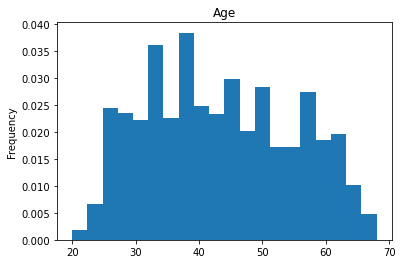

In [33]:
#plot charts

Analysis_df['DAYS_BIRTH']=-(Analysis_df['DAYS_BIRTH'])//365
print(Analysis_df['DAYS_BIRTH'].value_counts(bins=10,normalize=True,sort=False))
Analysis_df['DAYS_BIRTH'].plot(kind='hist',bins=20,density=True,title='Age')



In [57]:
print(Analysis_df['FLAG_OWN_REALTY'].value_counts())
print ('% of applicant owning a property = ' + str(round(Analysis_df['FLAG_OWN_REALTY'].sum()/Analysis_df['FLAG_OWN_REALTY'].shape[0]*100))+'%')


1    24506
0    11951
Name: FLAG_OWN_REALTY, dtype: int64
% of applicant owning a property = 67%


(2.544, 18.18]      22460
(18.18, 33.66]      11380
(33.66, 49.14]       2099
(49.14, 64.62]        274
(64.62, 80.1]         165
(80.1, 95.58]          58
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: AMT_INCOME_TOTAL, dtype: int64


<AxesSubplot:title={'center':'Income level'}, ylabel='Frequency'>

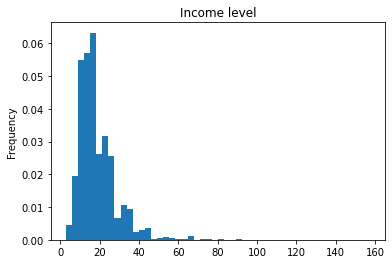

In [34]:
Analysis_df['AMT_INCOME_TOTAL']=Analysis_df['AMT_INCOME_TOTAL'].astype(object)
Analysis_df['AMT_INCOME_TOTAL'] = Analysis_df['AMT_INCOME_TOTAL']/10000 
print(Analysis_df['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
Analysis_df['AMT_INCOME_TOTAL'].plot(kind='hist',bins=50,density=True,title='Income level')


In [ ]:
print(Analysis_df['FLAG_OWN_CAR'].value_counts())
print ('% of applicant owning a car = ' + str(round(Analysis_df['FLAG_OWN_CAR'].sum()/Analysis_df['FLAG_OWN_CAR'].shape[0]*100))+'%')


In [236]:
#set x = all the data  
DataX = merged_df.iloc[:,1:-1]
#set y = label
DataY = merged_df.iloc[:,-1] 

In [237]:
#split the test data and training data with 30% of test size

X_train, X_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.2, random_state=42)


In [238]:
#scale data to [-1,1] ; increase SVM speed
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [239]:
#test for oversampling
credit_record_df_clean['STATUS'].value_counts(normalize=True) 

0    0.985495
1    0.014505
Name: STATUS, dtype: float64

In [240]:
#fix oversampling here
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [241]:
y_train.value_counts()

0    28666
1      499
Name: STATUS, dtype: int64

In [242]:
y_balanced.value_counts()

0    28666
1    28666
Name: STATUS, dtype: int64

In [243]:
y_test.value_counts()

0    7175
1     117
Name: STATUS, dtype: int64

In [244]:
y_test_balanced.value_counts()

0    7175
1    7175
Name: STATUS, dtype: int64

In [245]:
#machine learning

clf = svm.SVC()
clf.fit(X_balanced, y_balanced) 


SVC()

In [246]:
prediction = clf.predict(X_test_balanced)

In [247]:

print(classification_report(y_test_balanced, prediction))


              precision    recall  f1-score   support

           0       0.66      0.69      0.68      7175
           1       0.68      0.65      0.66      7175

    accuracy                           0.67     14350
   macro avg       0.67      0.67      0.67     14350
weighted avg       0.67      0.67      0.67     14350



In [255]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.67115
      0     1
0  4951  2224
1  2495  4680
[[0.69003484 0.30996516]
 [0.34773519 0.65226481]]


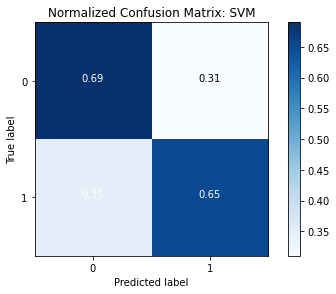

In [261]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, prediction)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,prediction)))
plot_confusion_matrix(confusion_matrix(y_test_balanced,prediction),
                      classes=['0','1'], normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

In [49]:
#Hyper-parameter tuning

#commented out below as I have not got them working yet

#param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
#grid = GridSearchCV(SVC(),param_grid)
#grid.fit(X_balanced, y_balanced)


KeyboardInterrupt: 

In [ ]:
#print(grid.best_params_)
#print(grid.score(X_test,y_test))